## 1.  Import Modules and Define Variables

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import math 
from scipy import optimize
from scipy.optimize import leastsq
import pandas
import matplotlib
    
    
colnames = ["Dates", "Times", "GRS_Long_Position", "GRS_Lat_Position", "GRS_Width", "GRS_Height"]

# Load in file
data = pandas.read_csv('/data/nemesis/hs413-om82/Jupyter Notebook/GRS/GRS Drift/2018-2020data.csv', names=colnames,
                       header =1)

# Put data into lists for plotting
dates_list = data.Dates.tolist()
times = data.Times.tolist()
y1 = GRSlongpos = data.GRS_Long_Position.tolist()
y2 = GRSlatpos = data.GRS_Lat_Position.tolist()
w = GRSwidth = data.GRS_Width.tolist()
h = GRSheight = data.GRS_Height.tolist()

w = np.array(w)
h = np.array(h)

#print(dates)
#print(GRSlongpos)

#Convert dates into proverbial 'days'   
dates = matplotlib.dates.datestr2num(dates_list)

x = dates = [x - 736740 for x in dates]
x = np.array(x)

#test = matplotlib.dates.datestr2num('2021-01-01')-736740

#print(test)

#now=datetime.now()
#nowday = int(now.strftime("%-j"))
#nowhour = int(now.strftime("%-H"))
#nowminute = int(now.strftime("%-M"))
#nowsecond = int(now.strftime("%-S"))
#nowtime = nowday + (nowhour+(nowminute+(nowsecond/60))/60)/24
#print(nowtime)

# Errors longitude / latitude from difrraction limit
yerr = werr = herr = 0.531
xerr = 1


# Adding 360 degrees to the longitudes that have looped around the Cylmap
y1_seg1 = y1[0:27]
y1_part = y1[27:45]
y1_seg2 = [x + 360 for x in y1_part]

# Corrected Long values
y1 = y1_seg1 + y1_seg2


## 2.  GRS Longitudinal Drift Rate

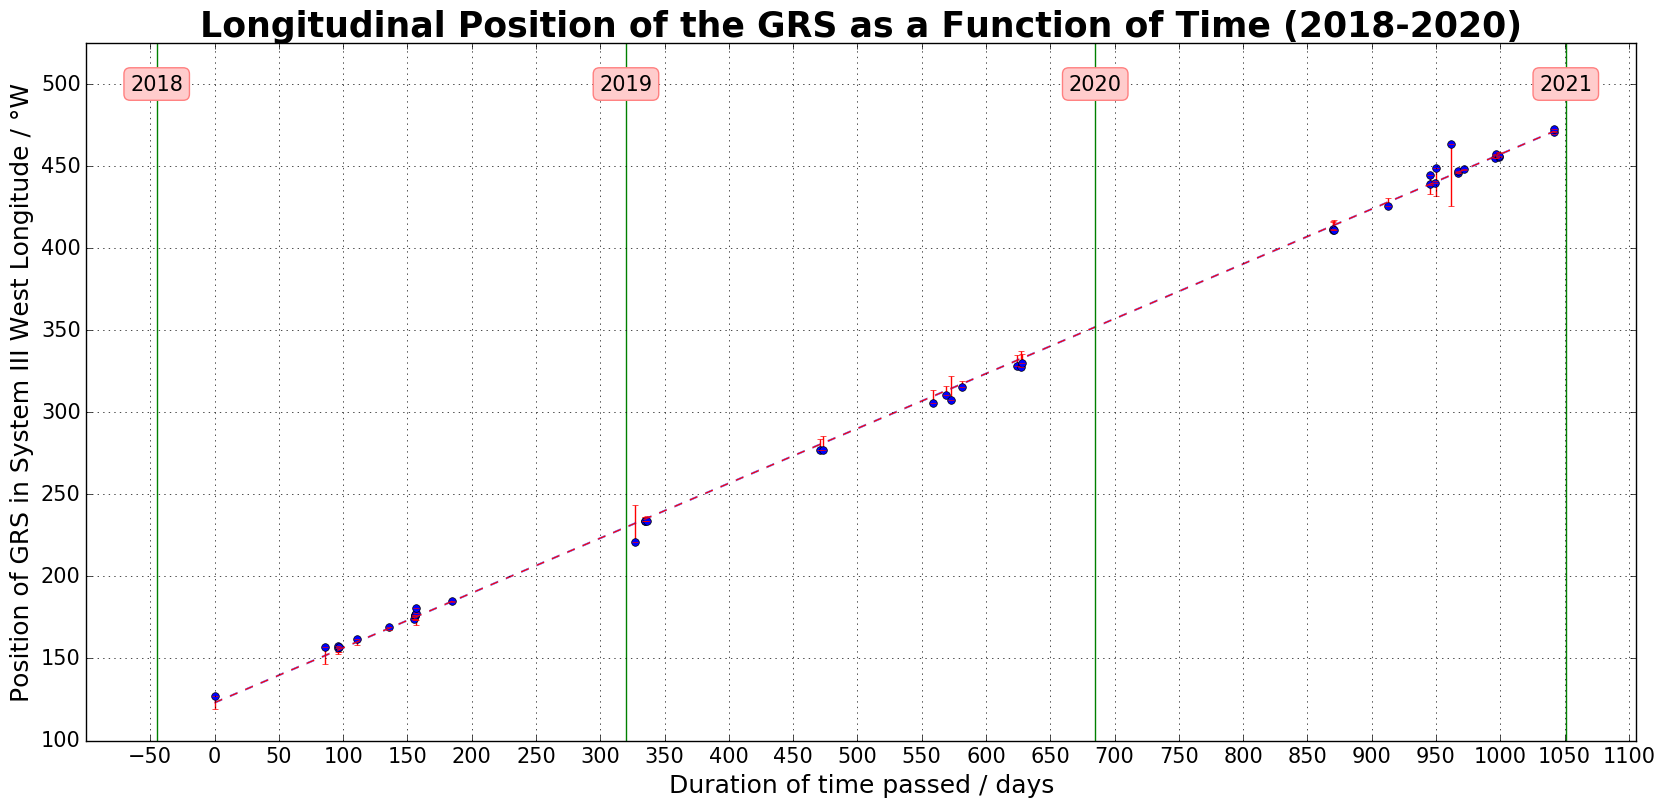

GRS mean longitudinal drift rate:   0.3341805263196741 °W / day
GRS upper longitudinal drift rate:   0.33519972017763955 °W / day
GRS lower longitudinal drift rate:   0.33316133246170865 °W / day
Uncertainity:    0.0010191938579654503

Circumference of Jupiter at Latitude -20°N:    412772.9213778283 km

GRS mean longitudinal drift speed:    15.965355569045382 km/h
GRS upper longitudinal drift speed:    16.014047192448476 km/h
GRS lower longitudinal drift speed:    15.916663945642288 km/h
Uncertainity in km/h:    0.0486916234030943

GRS mean longitudinal drift speed:    4.434820991401495 m/s
Uncertainity in m/s:    0.013525450945303972

Relative Error from Uncertainty:    0.30498301896577257


In [19]:
# Setup figure
fig = plt.figure(figsize = (20, 9))

#plt.errorbar(x, y1, yerr=yerr, xerr=xerr, fmt='.b', markersize=1, ecolor='b', elinewidth=0.5, capthick=0.5, capsize=1)

#Plot without error bars
plt.plot(x, y1, 'bo', markersize=5.5)


# Fit a regression line to the data
m, b = np.polyfit(x, y1, 1)
reg_lon= m*x+b

# Plot the data and the regression line on the same axis
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)), '--r', linewidth=1)
plt.errorbar(x, reg_lon, yerr=reg_lon - y1, fmt='.r', markersize=0.2, elinewidth=1, capthick=0.5, capsize=2)

# Plot uncertainty regression line
m_lonhigh = (((m*x[44]+b)+yerr)-(b-yerr))/(x[44]-x[0])
plt.plot(x, (m*x)+(b-yerr), '--b', linewidth=0.2)

m_lonlow = (((m*x[44]+b)-yerr)-(b+yerr))/(x[44]-x[0])
plt.plot(x, (m*x)+(b+yerr), '--b', linewidth=0.2)

# Plot vertical year lines
plt.axvline(x = -45.0, color = "green")
plt.axvline(x = 320.0, color = "green")
plt.axvline(x = 685.0, color = "green")
plt.axvline(x = 1051, color = "green")

plt.ylabel("Position of GRS in System III West Longitude / °W",size=18)
plt.xlabel("Duration of time passed / days",size=18)
plt.ylim(100,525)
plt.yticks(np.arange(100,526, step=50),size=15)
plt.xticks(np.arange(-50,1101, step=50), size=15)
plt.title("Longitudinal Position of the GRS as a Function of Time (2018-2020)", size=25, fontweight='bold')
plt.margins(0.05)

plt.text(-45,500, '2018', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(320,500, '2019', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(685,500, '2020', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(1051.0,500, '2021', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.grid(True)

# Save figure
plt.savefig("Longitudinal Drift of GRS 2018-2020.png")

# Output plot
plt.show()

# Output regression line gradient
print("GRS mean longitudinal drift rate:  ", m, "°W / day")
print("GRS upper longitudinal drift rate:  ", m_lonhigh, "°W / day")
print("GRS lower longitudinal drift rate:  ", m_lonlow, "°W / day")
m_lonerr = (m_lonhigh-m_lonlow)/2
print("Uncertainity:   ", m_lonerr)
print("")

# Circumference of Jupiter at Latitude -20 °N
radius = 69911
circum = 2*np.pi*radius*np.cos(math.radians(-20))
print("Circumference of Jupiter at Latitude -20°N:   ", circum, "km")
print("")

# Mean Drift speed in km/h 
v = (circum*m)/(360*24)
v_lonhigh = (circum*m_lonhigh)/(360*24)
v_lonlow = (circum*m_lonlow)/(360*24)
print("GRS mean longitudinal drift speed:   ", v, "km/h")
print("GRS upper longitudinal drift speed:   ", v_lonhigh, "km/h")
print("GRS lower longitudinal drift speed:   ", v_lonlow, "km/h")
v_lonerr = (v_lonhigh-v_lonlow)/2
print("Uncertainity in km/h:   ", v_lonerr)
print("")

# Mean drift speed in m/s
print("GRS mean longitudinal drift speed:   ", v/3.6, "m/s")
print("Uncertainity in m/s:   ", v_lonerr/3.6)
print("")
print("Relative Error from Uncertainty:   ", 100*m_lonerr/m)


## 3.  GRS Latitudinal Drift Plot

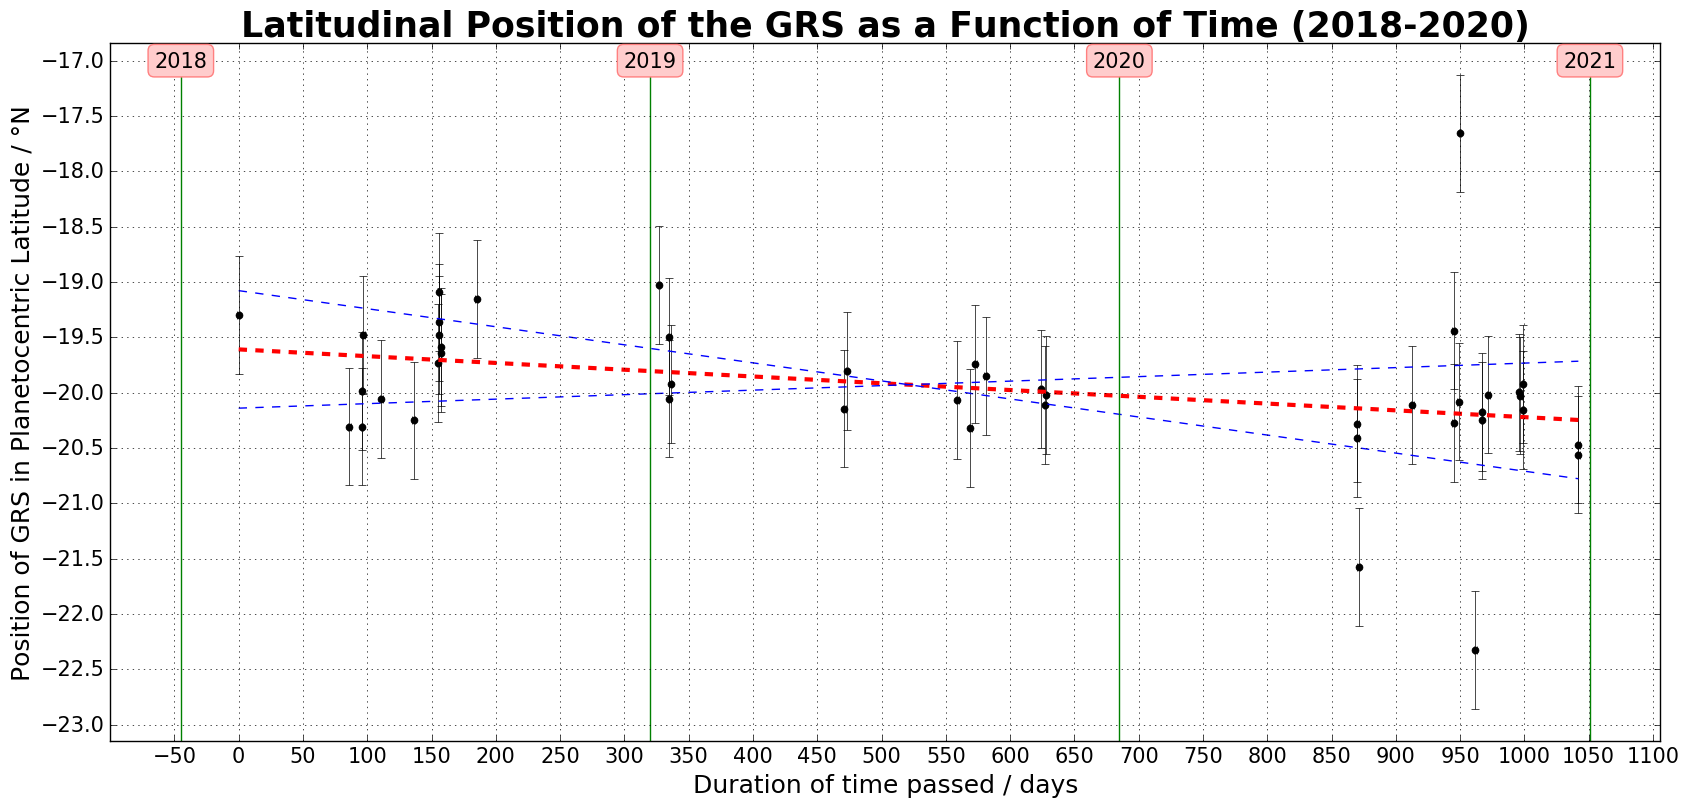

GRS mean latitude drift rate:   -0.0006120488632516901 °W / day
GRS upper latitude drift rate:   0.00040714499471375924 °W / day
GRS lower latitude drift rate:   -0.0016312427212171383 °W / day
Uncertainity:    0.0010191938579654487

Polar Circumference of Jupiter:    439263.7680102321 km

GRS mean latitudinal drift speed:    -0.031117001143323688 km/h
GRS upper latitudinal drift speed:    0.020699542188017582 km/h
GRS lower latitudinal drift speed:    -0.0829335444746649 km/h
Uncertainity:    0.05181654333134124

GRS mean latitudinal drift speed:    -0.008643611428701025 m/s
Uncertainity:    0.014393484258705899

Mean Latitude:    -19.955112285969424

Relative Error from Uncertainty:    -166.52164870475877


In [18]:
# Setup figure
fig = plt.figure(figsize = (20, 9))

# Plot with error bars
plt.errorbar(x, y2, yerr=yerr, xerr=xerr, fmt='.k', markersize=8, ecolor='k', elinewidth=0.5, capthick=0.5, capsize=3)
    
#Plot without error bars
plt.plot(x, y2, 'ko', markersize=5)


# Fit a regression line to the data
m_lat, b_lat = np.polyfit(x, y2, 1)
reg_lat = m_lat*x+b_lat

# Plot the data and the regression line on the same axis
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y2, 1))(np.unique(x)), '--r', linewidth=3)
#plt.errorbar(x, reg_lat, yerr=reg_lat - y2, fmt='.r', markersize = 1, elinewidth=1, capthick=1, capsize=5)

# Plot uncertainty regression line
m_lathigh = (((m_lat*x[44]+b_lat)+yerr)-(b_lat-yerr))/(x[44]-x[0])
plt.plot(x, (m_lathigh*x)+(b_lat-yerr), '--b', linewidth=1)

m_latlow = (((m_lat*x[44]+b_lat)-yerr)-(b_lat+yerr))/(x[44]-x[0])
plt.plot(x, (m_latlow*x)+(b_lat+yerr), '--b', linewidth=1)

# Plot vertical year lines
plt.axvline(x = -45.0, color = "green")
plt.axvline(x = 320.0, color = "green")
plt.axvline(x = 685.0, color = "green")
plt.axvline(x = 1051, color = "green")

plt.ylabel("Position of GRS in Planetocentric Latitude / °N",size=18)
plt.yticks(np.arange(-24,-16, step=0.5), size =15)

plt.xlabel("Duration of time passed / days",size=18)
#plt.xlim(-125,1125)
plt.xticks(np.arange(-50,1101, step=50), size=15)

plt.margins(0.05)
plt.title("Latitudinal Position of the GRS as a Function of Time (2018-2020)", size=25, fontweight='bold')

plt.text(-45,-17.0, '2018', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(320,-17.0, '2019', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(685,-17.0, '2020', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(1051.0,-17.0, '2021', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.grid(True)
# Save figure
plt.savefig("Latitudinal Drift of GRS 2018-2020.png")

# Output plot
plt.show()

# Output regression line gradient
print("GRS mean latitude drift rate:  ", m_lat, "°W / day")
print("GRS upper latitude drift rate:  ", m_lathigh, "°W / day")
print("GRS lower latitude drift rate:  ", m_latlow, "°W / day")
m_laterr = (m_lathigh-m_latlow)/2
print("Uncertainity:   ", m_laterr)
print("")

# Polar Circumference of Jupiter
circum_p = 2*np.pi*radius
print("Polar Circumference of Jupiter:   ", circum_p, "km")
print("")

# Mean Drift speed in km/h 
v_lat = (circum_p*m_lat)/(360*24)
v_latlow = (circum_p*m_latlow)/(360*24)
v_lathigh = (circum_p*m_lathigh)/(360*24)
print("GRS mean latitudinal drift speed:   ", v_lat, "km/h")
print("GRS upper latitudinal drift speed:   ", v_lathigh, "km/h")
print("GRS lower latitudinal drift speed:   ", v_latlow, "km/h")
v_laterr = (v_lathigh-v_latlow)/2
print("Uncertainity:   ", v_laterr)
print("")

# Mean drift speed in m/s
print("GRS mean latitudinal drift speed:   ", v_lat/3.6, "m/s")
print("Uncertainity:   ", v_laterr/3.6)
print("")

# Mean Latitude
meanlat = np.mean(y2)

print("Mean Latitude:   ",meanlat)

print("")
print("Relative Error from Uncertainty:   ", 100*m_laterr/m_lat)
      

## 4  GRS 90 Day Oscillation 

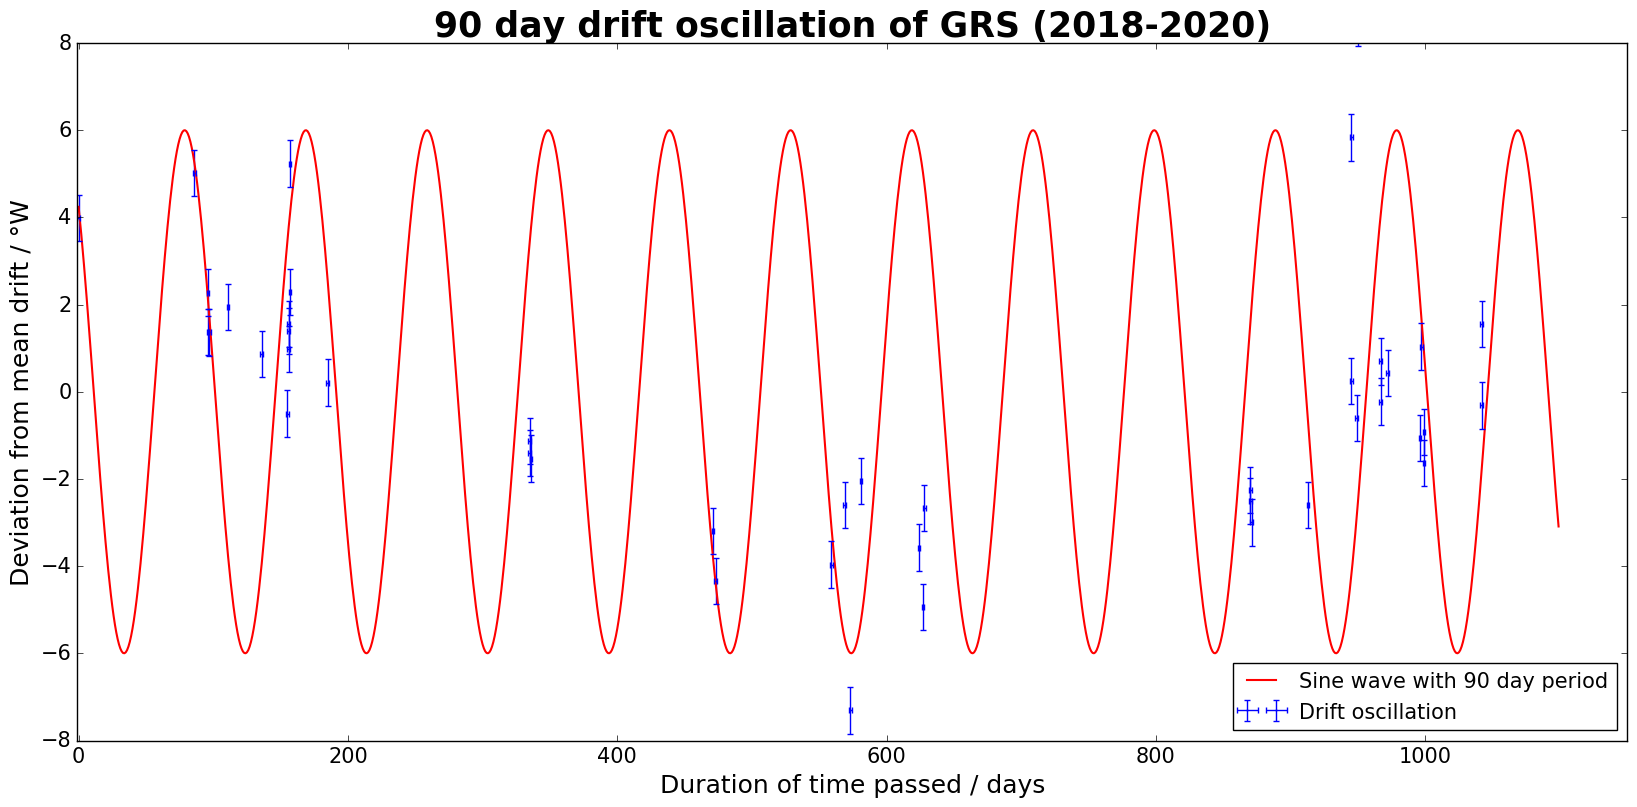

Mean sinusoidal deviation from known Oscillatory period:   -0.891082400997263 °W


In [7]:
# Finding the 90 day oscillation in the 2018 - 2019 Time Series

# Create deviation function
z = m*x + b
ydev = y1-z

# Create a sine wave with Period of 90 days
time = np.arange(0, 1100, 1)
amplitude = 6
period = 90
phase = 3*np.pi/4
Sine = amplitude*(np.sin((2*np.pi/period)*time + phase))

plt.figure(figsize = (20,9))

plt.plot(time, Sine, '-r', label = 'Sine wave with 90 day period', linewidth = 1.5)
plt.errorbar(x, ydev, yerr=yerr, xerr=xerr, fmt='.b', markersize=2, ecolor='b', elinewidth=1, capthick=1, 
             capsize=2, label = 'Drift oscillation')

plt.ylim(-8,8)
plt.xlim(-1,1150)
plt.yticks(size=15)
plt.xticks(size=15)

plt.xlabel("Duration of time passed / days",size=18)
plt.ylabel("Deviation from mean drift / °W",size=18)
plt.title("90 day drift oscillation of GRS (2018-2020)", size=25, fontweight = 'bold')
plt.legend(loc=4, prop={'size': 15})
 
# Save figure    
plt.savefig("GRS 90 day oscillation 2018-2020.png")

# Output plot
plt.show()

# We can also take the Sinusoidal deviation
z2 = amplitude*(np.sin(((2*np.pi/period)*x) + phase))
sin_dev = ydev - z2

# Find the mean of the sinusoidal deviation
sin_dev_mean = sum(sin_dev)/len(sin_dev)
print("Mean sinusoidal deviation from known Oscillatory period:  ", sin_dev_mean, "°W")

## 5 GRS Width Size

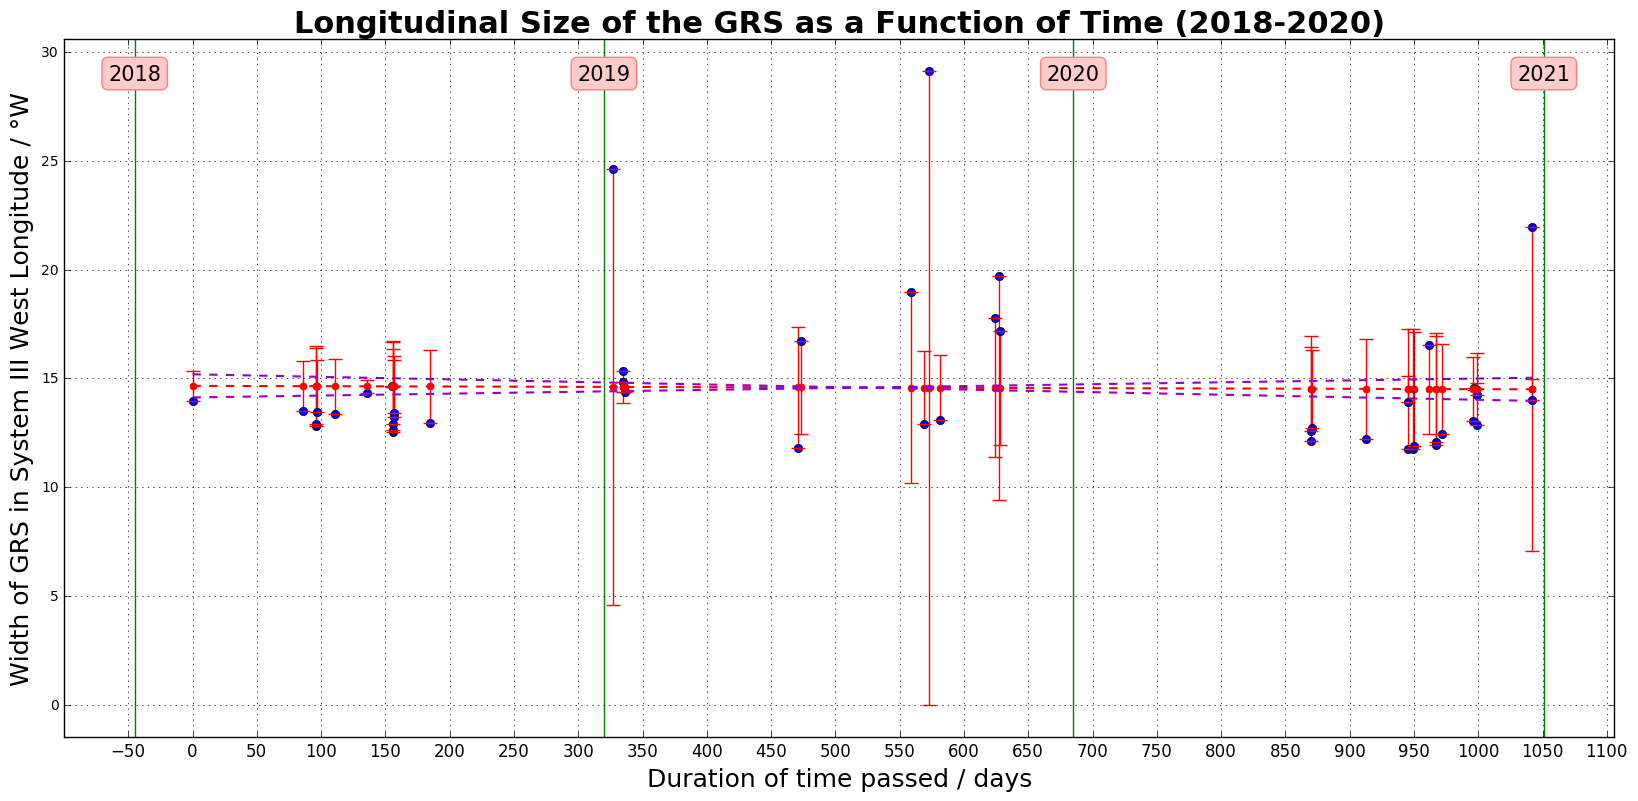

GRS mean width change  Rate:   -0.0001514549362907708 °W / day
GRS upper width change  Rate:   0.0008677389216746805 °W / day
GRS lower width change  Rate:   -0.0011706487942562238 °W / day
Uncertainity:    0.0010191938579654522

GRS mean latitudinal width rate:    -0.0072357056145641585 km/h
GRS upper latitudinal width rate:    0.0414559177885306 km/h
GRS low latitudinal width rate:    -0.055927329017659 km/h
Uncertainity:    0.0486916234030948


In [8]:
# Setup figure
fig = plt.figure(figsize = (20, 9))

# Plot with error bars
#plt.errorbar(x, w, yerr=yerr, xerr=xerr, fmt='.b', markersize=8, ecolor='k', elinewidth=0.5, capthick=0.5, capsize=3)
    
#Plot without error bars
plt.plot(x, w, 'bo', markersize=6)


# Fit a regression line to the data
m_wid, b_wid = np.polyfit(x, w, 1)
reg_wid = m_wid*x+b_wid

# Plot the data and the regression line on the same axis
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, w, 1))(np.unique(x)), '--r', linewidth=1.5)
plt.errorbar(x, reg_wid, yerr=reg_wid - w, fmt='.r', markersize = 10, elinewidth=1, capthick=1, capsize=5)

# Plot uncertainty regression line
m_widhigh = (((m_wid*x[44]+b_wid)+werr)-(b_wid-werr))/(x[44]-x[0])
plt.plot(x, (m_widhigh*x)+(b_wid-werr), '--', color = "darkviolet", linewidth=1.5)

m_widlow = (((m_wid*x[44]+b_wid)-werr)-(b_wid+werr))/(x[44]-x[0])
plt.plot(x, (m_widlow*x)+(b_wid+werr), '--', color = "darkviolet",linewidth=1.5)

# Plot vertical year lines
plt.axvline(x = -45.0, color = "green")
plt.axvline(x = 320.0, color = "green")
plt.axvline(x = 685.0, color = "green")
plt.axvline(x = 1051, color = "green")

plt.ylabel("Width of GRS in System III West Longitude / °W",size=18)
#plt.yticks(np.arange(-23,-17, step=0.5), size =12)

plt.xlabel("Duration of time passed / days",size=18)
#plt.xlim(-125,1125)
plt.xticks(np.arange(-50,1101, step=50), size=12)

plt.margins(0.05)
plt.title("Longitudinal Size of the GRS as a Function of Time (2018-2020)", size=22, fontweight='bold')

plt.text(-45,29, '2018', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(320,29, '2019', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(685, 29, '2020', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(1051.0,29, '2021', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.grid(True)
# Save figure
plt.savefig("Longitudinal Size of GRS 2018-2020.png")

# Output plot
plt.show()

# Output regression line gradient
print("GRS mean width change  Rate:  ", m_wid, "°W / day")
print("GRS upper width change  Rate:  ", m_widhigh, "°W / day")
print("GRS lower width change  Rate:  ", m_widlow, "°W / day")
m_widerr = (m_widhigh-m_widlow)/2
print("Uncertainity:   ", m_widerr)
print("")

# Circumference of Jupiter at Latitude -20 °N
circum = 2*np.pi*radius*np.cos(math.radians(-20))
#print("Polar Circumference of Jupiter:   ", circum_p, "km")

# Mean Drift speed in km/h 
v_wid = (circum*m_wid)/(360*24)
v_widlow = (circum*m_widlow)/(360*24)
v_widhigh = (circum*m_widhigh)/(360*24)
print("GRS mean latitudinal width rate:   ", v_wid, "km/h")
print("GRS upper latitudinal width rate:   ", v_widhigh, "km/h")
print("GRS low latitudinal width rate:   ", v_widlow, "km/h")
v_widerr = (v_widhigh-v_widlow)/2
print("Uncertainity:   ", v_widerr)

## 6 Height

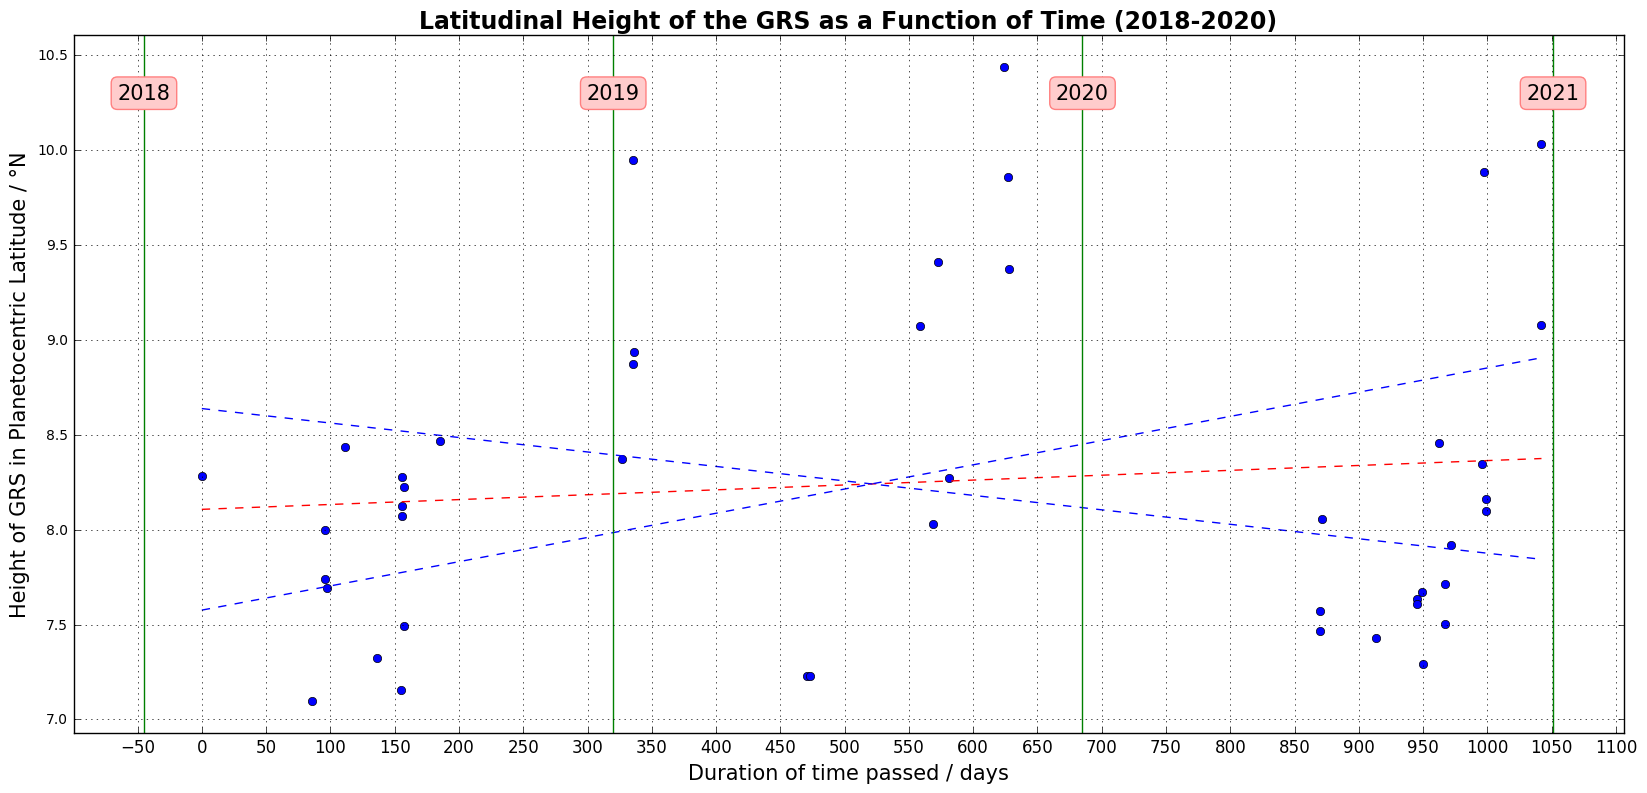

GRS mean height change rate:   0.0002569519405308709 °N / day
GRS upper height change rate:   0.0012761457984963222 °N / day
GRS lower height change rate:   -0.0007622419174345804 °N / day
Uncertainity:    0.0010191938579654513

GRS mean latitudinal height rate speed:    0.0130636200920291 km/h
GRS upper latitudinal height rate speed:    0.06488016342337047 km/h
GRS lower latitudinal height rate speed:    -0.03875292323931227 km/h
Uncertainity:    0.05181654333134137


In [9]:
# Setup figure
fig = plt.figure(figsize = (20, 9))

# Plot with error bars
#plt.errorbar(x, y2, yerr=yerr, xerr=xerr, fmt='.b', markersize=0.5, ecolor='b', elinewidth=0.5, capthick=0.5, capsize=1)
    
#Plot without error bars
plt.plot(x, h, 'bo', markersize=6)


# Fit a regression line to the data
m_hei, b_hei = np.polyfit(x, h, 1)

# Plot the data and the regression line on the same axis
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, h, 1))(np.unique(x)), '--r', linewidth=1)

# Plot uncertainty regression line
m_heihigh = (((m_hei*x[44]+b_hei)+herr)-(b_hei-herr))/(x[44]-x[0])
plt.plot(x, (m_heihigh*x)+(b_hei-herr), '--b', linewidth=1)

m_heilow = (((m_hei*x[44]+b_hei)-herr)-(b_hei+herr))/(x[44]-x[0])
plt.plot(x, (m_heilow*x)+(b_hei+herr), '--b', linewidth=1)

# Plot vertical year lines
plt.axvline(x = -45.0, color = "green")
plt.axvline(x = 320.0, color = "green")
plt.axvline(x = 685.0, color = "green")
plt.axvline(x = 1051, color = "green")

plt.ylabel("Height of GRS in Planetocentric Latitude / °N",size=15)
#plt.yticks(np.arange(-23,-17, step=0.5), size =12)

plt.xlabel("Duration of time passed / days",size=15)
#plt.xlim(-125,1125)
plt.xticks(np.arange(-50,1101, step=50), size=12)

plt.margins(0.05)
plt.title("Latitudinal Height of the GRS as a Function of Time (2018-2020)", size=17, fontweight='bold')

plt.text(-45,10.3, '2018', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(320,10.3, '2019', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(685, 10.3, '2020', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(1051.0, 10.3, '2021', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.grid(True)
# Save figure
plt.savefig("Latitudinal Size of GRS 2018-2020.png")

# Output plot
plt.show()

# Output regression line gradient
print("GRS mean height change rate:  ", m_hei, "°N / day")
print("GRS upper height change rate:  ", m_heihigh, "°N / day")
print("GRS lower height change rate:  ", m_heilow, "°N / day")
m_heierr = (m_heihigh-m_heilow)/2
print("Uncertainity:   ", m_heierr)
print("")

# Polar Circumference of Jupiter
circum_p = 2*np.pi*radius
#print("Polar Circumference of Jupiter:   ", circum_p, "km")


# Mean Drift speed in km/h 
v_hei = (circum_p*m_hei)/(360*24)
v_heihigh = (circum_p*m_heihigh)/(360*24)
v_heilow = (circum_p*m_heilow)/(360*24)
print("GRS mean latitudinal height rate speed:   ", v_hei, "km/h")
print("GRS upper latitudinal height rate speed:   ", v_heihigh, "km/h")
print("GRS lower latitudinal height rate speed:   ", v_heilow, "km/h")
v_heierr = (v_heihigh-v_heilow)/2
print("Uncertainity:   ", v_heierr)


## 7   GRS Aspect ratio 

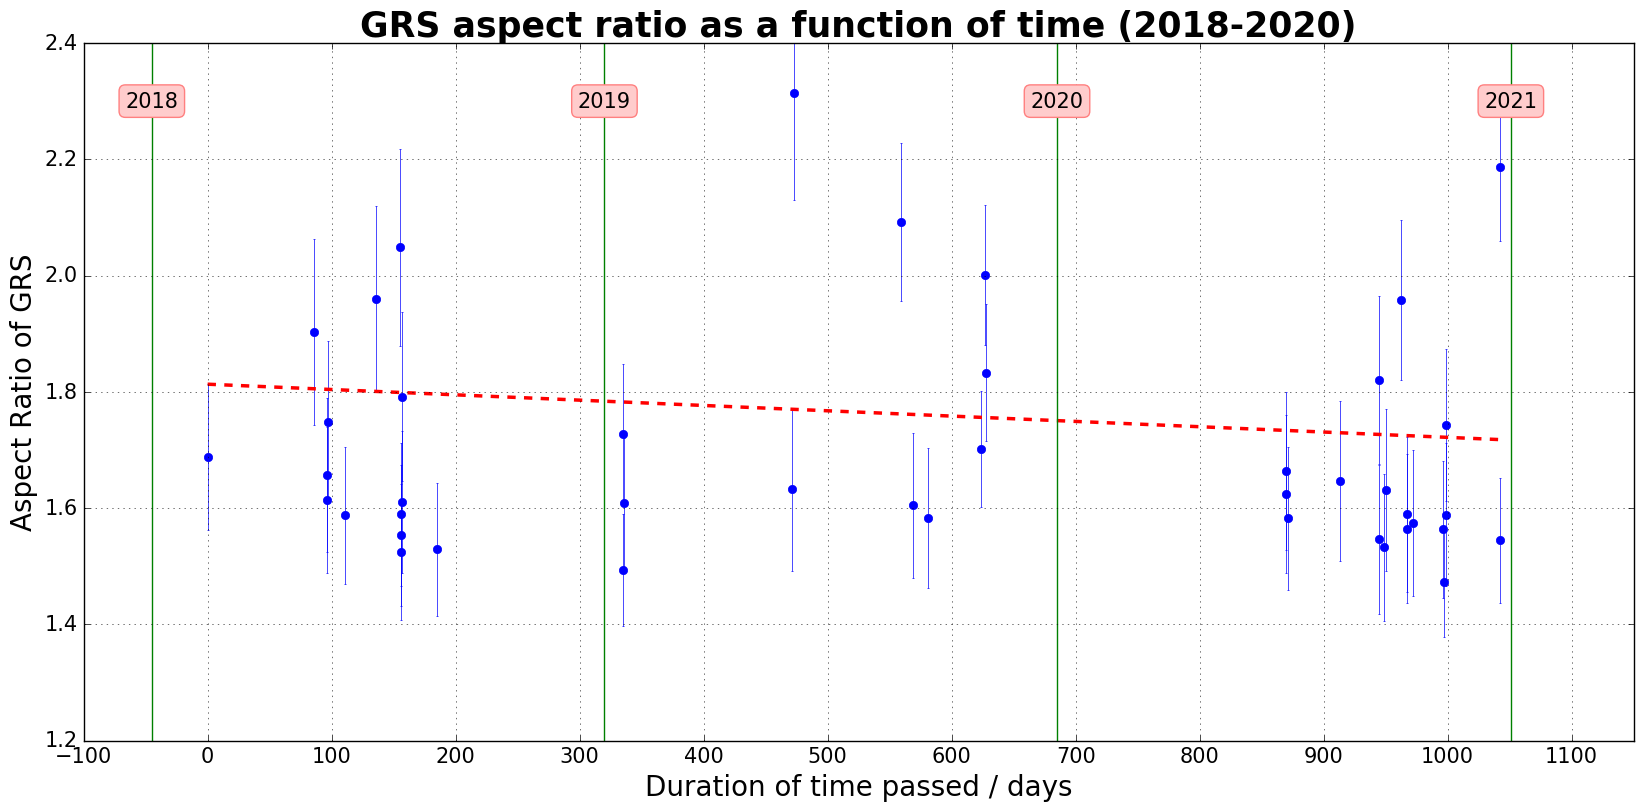

Average rate of change in aspect ratio of GRS:   -9.146399539469556e-05 per day
GRS mean Latitudinal height:    8.252548073824311 °N
GRS mean height:    10069.570451649028 km

GRS average width change:    -0.9210031454161891 km/day

Time taken before the GRS to become circular from 15/02/2018:    8888.666967418887 days
Time taken before the GRS to become circular from 2018:    24.335843853302908 years


In [20]:
# Define the Width-Height ratio
r = ratio = w/h

# Using the relative errors to find the error of the Ratio
#w_rel = werr/w
#h_rel = herr/h
#w_rel2 = [error ** 2 for error in w_rel]
#h_rel2 = [error ** 2 for error in h_rel]
#r_rel2 = [a + b for a, b in zip(w_rel2, h_rel2)]
#r_rel = [math.sqrt(rerror) for rerror in r_rel2]
#rerr = r*r_rel

# Set figure size
plt.figure(figsize = (20, 9))

# Plot with error bars
plt.errorbar(x,ratio, yerr=rerr, xerr=xerr, fmt='.b', markersize=12, ecolor='b', elinewidth=0.5, capthick=0.5, 
             capsize=1)    
    
# Fit a regression line to the data
m_r, b_r = np.polyfit(x, r, 1) 
#reg_r = m_r*x+b_r

# Plot regression line
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, r, 1))(np.unique(x)), '--r', linewidth=2.5) 
#plt.errorbar(x, reg_r, yerr=reg_r - r, fmt='.r', markersize=3, elinewidth=0.8, capthick=0.5, capsize=1)

# Plot uncertainty regression line
#m_rhigh = (((m_r*x[44]+b_r)+rerr[44])-(b_r-rerr[0]))/(x[44]-x[0])
#plt.plot(x, (m_rhigh*x)+(b_r-rerr[44]), '--b', linewidth=1)

#m_rlow = (((m_r*x[44]+b_r)-rerr[44])-(b_r+rerr[0]))/(x[44]-x[0])
#plt.plot(x, (m_rlow*x)+(b_r+rerr[44]), '--b', linewidth=1)

# Setting Limits
plt.xlim(-1, 1150)
plt.ylim(1.2, 2.4)

# Plot vertical year lines
plt.axvline(x = -45.0, color = "green")
plt.axvline(x = 320.0, color = "green")
plt.axvline(x = 685.0, color = "green")
plt.axvline(x = 1051, color = "green")

plt.xlabel("Duration of time passed / days",size=20)
plt.xticks(np.arange(-100,1101, step=100), size=15)
plt.ylabel("Aspect Ratio of GRS",size=20)
plt.yticks(np.arange(1.2,2.5, step=0.2),size=15)
plt.margins(0.05)

plt.title("GRS aspect ratio as a function of time (2018-2020)", size=25, fontweight='bold')

plt.text(-45,2.3, '2018', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(320,2.3, '2019', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(685, 2.3, '2020', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.text(1051.0, 2.3, '2021', fontsize=15,ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.grid(b=True, linewidth = 0.4)
# Save figure
plt.savefig("GRS aspect ratio change 2018-2020.png") 

# Output plot
plt.show()


# Rate of change in GRS width-height ratio
print("Average rate of change in aspect ratio of GRS:  ", m_r, "per day")
#print("Upper rate of change in aspect ratio of GRS:  ", m_rhigh, "per day")
#print("Lower rate of change in aspect ratio of GRS:  ", m_rlow, "per day")
#m_rerr = (m_rhigh-m_rlow)/2
#print("Uncertainity:   ", m_rerr)
#print("")

# Mean height of GRS in Latitude
h_mean = sum(h)/len(h)
print("GRS mean Latitudinal height:   ", h_mean, "°N")

# Mean height of GRS in km
h_mean1 = (h_mean*circum_p)/360
print("GRS mean height:   ", h_mean1, "km")
print("")

# GRS width change per day
m_r1 = m_r * h_mean1
print("GRS average width change:   ", m_r1, "km/day" )
print("")

# Time take for GRS to become circular (when ratio = 1) (1 = mx + c  ->  x = (1-c)/m)
circ_time = (1 - b_r)/m_r

print("Time taken before the GRS to become circular from 15/02/2018:   ", circ_time, "days")
print("Time taken before the GRS to become circular from 2018:   ", circ_time/365.25, "years")

# 24 years from 2018 is 2042 which is similar to article from UniveristyToday 
